<a href="https://colab.research.google.com/github/09Vaibhav/ML_Practice/blob/main/Linear_poly_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/practice/Advertising.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('sales',axis=1)

In [8]:
Y = df['sales']

**LINEAR** **REGRESSION**

In [9]:
from sklearn.model_selection import train_test_split


In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [18]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()
l_model.fit(x_train,y_train)
test_pred = l_model.predict(x_test)


In [19]:
#error calculation
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,test_pred)
mse = mean_squared_error(y_test,test_pred)
rmse = np.sqrt(mse)
Y.mean()
print('mae',mae)
print('rmse',rmse)

mae 1.5116692224549086
rmse 1.9485372043446387


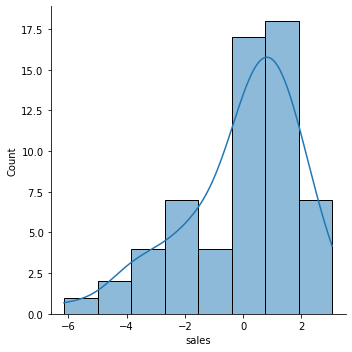

In [23]:
#the residual plot for linear regression  is random and normally distributed 
sns.displot(residual,kde= True)  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


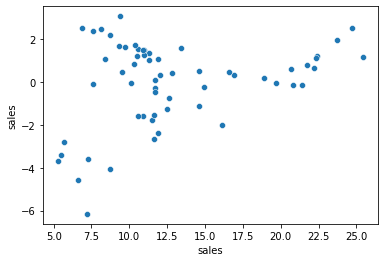

In [24]:
#even after calculating mae and rmse , we cannot say whether model is best fitted for linear regression or not 
#thats why we plot residual vs y_test , and if this scatter plot is random and not showing any pattern , thwm it says that model is linear , 
# if plot (residual vs y_test), shows any specific pattern , it means model is non linear
residual = y_test - test_pred
sns.scatterplot(y_test,residual)

**POLYNOMIAL** **REGRESSION**

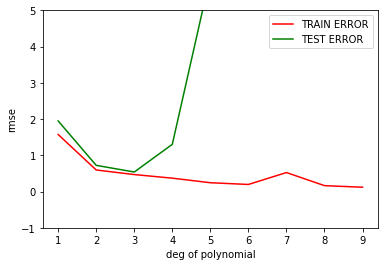

In [43]:
from sklearn.preprocessing import PolynomialFeatures 
train_rmse_error = []
test_rmse_error = []
d_list = []
for d in range(1,10):
  poly_converter = PolynomialFeatures(degree = d,include_bias = False)
  poly_features = poly_converter.fit_transform(X)
  x_train,x_test,y_train,y_test = train_test_split(poly_features,Y,test_size = 0.3,random_state = 42)
  model = LinearRegression()
  model.fit(x_train,y_train)
  test_pred = model.predict(x_test)
  train_pred = model.predict(x_train)
  rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
  rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
  train_rmse_error.append(rmse_train)
  test_rmse_error.append(rmse_test)
  d_list.append(d) 
plt.plot(d_list,train_rmse_error,label = 'TRAIN ERROR', color = 'red')
plt.plot(d_list,test_rmse_error,label = 'TEST ERROR',color = 'green')
plt.xlabel('deg of polynomial')
plt.ylabel('rmse')
plt.ylim(-1,5)
plt.legend()


#conclusion 
#from error vs model complexity plot , we get to know that after deg of polynomial = 3, the test error rmse is increasing , and
#hence ,polynomial regression with  degree = 3 is best fit for the above data set than linear regression


In [45]:
final_poly_converter = PolynomialFeatures(degree = 3,include_bias = False)
final_poly_features = final_poly_converter.fit_transform(X)
final_model = LinearRegression()
final_model.fit(final_poly_features,Y)


LinearRegression()

In [47]:
from joblib import dump ,load
dump(final_poly_converter,"/content/drive/MyDrive/practice/Advertising_model_converter.joblib")
dump(final_model,"/content/drive/MyDrive/practice/Advertising_model.joblib")
loaded_conv = load("/content/drive/MyDrive/practice/Advertising_model_converter.joblib")
loaded_model = load("/content/drive/MyDrive/practice/Advertising_model.joblib")

In [49]:
loaded_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [51]:
campaign = [[149,22,12]]
transformed_data = loaded_conv.fit_transform(campaign)
loaded_model.predict(transformed_data)

array([14.64501014])

**SCALING**
Feature Scaling lead to increase in performance and also allow us to directly compare the model coefficients to each other 

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**REGULARIZATION**

In [56]:
#L2_REGULARIZATION with cross validation

from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(alphas=(0.1,1.0,10.0))
ridge_model.fit(x_train,y_train)
test_pred = ridge_model.predict(x_test)
mae1 = mean_absolute_error(y_test,test_pred)
mse1 = mean_squared_error(y_test,test_pred)
rmse1 = np.sqrt(mse1)

In [61]:
print('mae',mae1)
print('rmse',rmse1)

mae 0.7128374052178083
rmse 1.6156062513017073


In [58]:
ridge_model.alpha_

0.1

In [60]:
#L1_REGULARIZATION with cross validation

from sklearn.linear_model import LassoCV
Lasso_model = LassoCV(eps=0.1,n_alphas= 100,cv = 5)
Lasso_model.fit(x_train,y_train)
test_pred = Lasso_model.predict(x_test)
mae2 = mean_absolute_error(y_test,test_pred)
mse2 = mean_squared_error(y_test,test_pred)
rmse2 = np.sqrt(mse2)

In [62]:
print('mae',mae2)
print('rmse',rmse2)
Lasso_model.alpha_

mae 0.6811456342837985
rmse 1.0349127365478732


0.4924531806474871

In [64]:
ridge_model.coef_

array([ 5.54020585,  0.37459878,  0.757098  , -3.50357246,  3.69925673,
       -0.35095792,  0.25570445,  0.34170196, -0.32318849, -1.28121839,
       -1.42943459, -1.39166855,  1.10004394, -0.02464284,  0.48270094,
       -0.04755845,  0.33929326, -0.6106555 , -0.49178547,  0.25266123,
        0.39246949, -0.22125197, -2.08343973,  0.07164835, -0.14375879,
        0.91164067, -0.43936549, -0.07692591,  0.35281559, -0.32632871,
        0.23535936, -0.14800517, -0.36765909,  0.04621173,  0.6461969 ,
        1.11863488,  0.32442191, -0.15704158,  0.56006988,  0.06237146,
       -1.72340572,  0.15996558,  0.20062405, -0.09825228,  1.10940031,
       -0.30138139, -0.31408868, -0.09591318,  0.15538151, -0.41704835,
        0.03125876, -0.06459804,  0.01403663,  0.14878116,  0.42621107,
        0.47648026,  0.86402274,  0.37767234,  0.58518875,  0.37026643,
        0.1621047 , -0.08730054,  0.54374503,  0.20954776, -0.03998549,
       -1.30269647,  0.28471775,  0.30011714,  0.05401327, -0.08

In [65]:
Lasso_model.coef_
#lassocv model will result in reducing the dependence of model of maximum features by fitting it
#such that most of the coeff of the model will be zero

array([ 0.97675148,  0.        ,  0.        ,  0.        ,  3.8148913 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [66]:
#to decrease the mae and rmse , tune eps and max iter 
#L1_REGULARIZATION

from sklearn.linear_model import LassoCV
Lasso_model_1 = LassoCV(eps=0.001,n_alphas= 100,cv = 5,max_iter = 1000000)
Lasso_model_1.fit(x_train,y_train)
test_pred = Lasso_model_1.predict(x_test)
mae3 = mean_absolute_error(y_test,test_pred)
mse3 = mean_squared_error(y_test,test_pred)
rmse3 = np.sqrt(mse3)

In [67]:
#we can reduce the mae and rmse by tuning for eps(retio of alpha_min/alpha_max)and max iteration
print('mae',mae3)
print('rmse',rmse3)
Lasso_model_1.alpha_

mae 0.46690331672106583
rmse 0.598217324921286


0.005662014893553132

In [68]:
#ElaticNet Regularization
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio = [0.1,0.5,0.7,0.9,0.95,0.99,1],eps = 0.001,n_alphas = 100,max_iter = 1000000)
elastic_model.fit(x_train,y_train)
test_pred = elastic_model.predict(x_test)
mae4 = mean_absolute_error(y_test,test_pred)
mse4 = mean_squared_error(y_test,test_pred)
rmse4 = np.sqrt(mse4)

In [69]:
print('mae',mae4)
print('rmse',rmse4)
elastic_model.alpha_

mae 0.46690331672106583
rmse 0.598217324921286


0.005662014893553132